In [42]:
# Import necessary libraries
import os
import sys
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [2]:
# File path
file_dir = '.\\data\\source\\6_dB_slider\\slider\\id_00\\abnormal\\'
file_name = '00000000.wav'
file_path = os.path.join(file_dir, file_name)

In [3]:
help(librosa.load)

Help on function load in module librosa.core.audio:

load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
    Load an audio file as a floating point time series.
    
    Audio will be automatically resampled to the given rate
    (default ``sr=22050``).
    
    To preserve the native sampling rate of the file, use ``sr=None``.
    
    Parameters
    ----------
    path : string, int, pathlib.Path or file-like object
        path to the input file.
    
        Any codec supported by `soundfile` or `audioread` will work.
    
        Any string file paths, or any object implementing Python's
        file interface (e.g. `pathlib.Path`) are supported as `path`.
    
        If the codec is supported by `soundfile`, then `path` can also be
        an open file descriptor (int).
    
        On the contrary, if the codec is not supported by `soundfile`
        (for example, MP3), then `path` must be a file path (string or `pat

In [4]:
# Load the audio file 
signal, fs = librosa.load(file_path, sr=None, mono=False)
signal = signal[0, :]
print(f"File duration: {librosa.get_duration(filename=file_path)} s, fs={fs} Hz")

File duration: 10.0 s, fs=16000 Hz


In [5]:
help(plt.axes)

Help on function axes in module matplotlib.pyplot:

axes(arg=None, **kwargs)
    Add an axes to the current figure and make it the current axes.
    
    Call signatures::
    
        plt.axes()
        plt.axes(rect, projection=None, polar=False, **kwargs)
        plt.axes(ax)
    
    Parameters
    ----------
    arg : None or 4-tuple
        The exact behavior of this function depends on the type:
    
        - *None*: A new full window axes is added using
          ``subplot(**kwargs)``.
        - 4-tuple of floats *rect* = ``[left, bottom, width, height]``.
          A new axes is added with dimensions *rect* in normalized
          (0, 1) units using `~.Figure.add_axes` on the current figure.
    
    projection : {None, 'aitoff', 'hammer', 'lambert', 'mollweide', 'polar', 'rectilinear', str}, optional
        The projection type of the `~.axes.Axes`. *str* is the name of
        a custom projection, see `~matplotlib.projections`. The default
        None results in a 'rectili

C:\Users\ecebo\anaconda3\envs\audio_malfunction_detection\lib\site-packages\librosa\util\utils.py:198: UserWarning: librosa.util.frame called with axis=-1 on a non-contiguous input. This will result in a copy.
  warnings.warn(


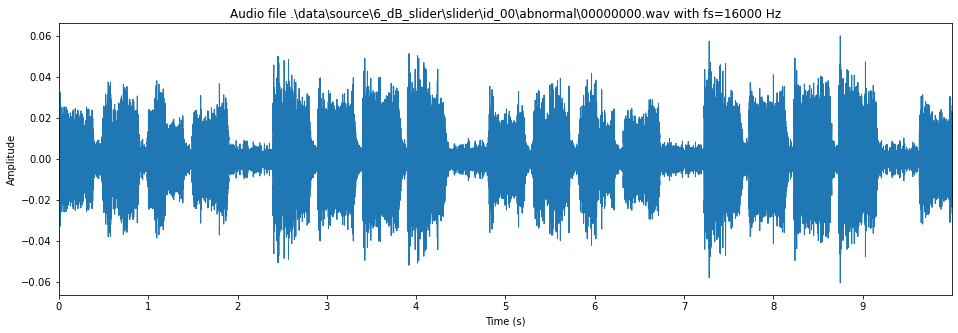

In [6]:
# Plot the signal
plt.figure(figsize=(16,5))
plt.subplot(111)
librosa.display.waveplot(signal, sr=fs)
plt.title(f"Audio file {file_path} with fs={fs} Hz")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

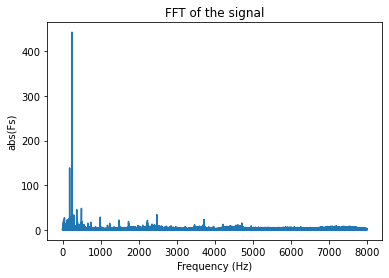

In [7]:
# Compute and plot the FFT
sig_fft = np.fft.fft(signal)
freq = np.linspace(0, fs, len(sig_fft))

sig_fft_left = sig_fft[:len(freq)//2]
freq_left = freq[:len(freq)//2]

plt.plot(freq_left, abs(sig_fft_left))
plt.title("FFT of the signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("abs(Fs)")
plt.show()

In [15]:
help(librosa.filters.mel)

Help on function mel in module librosa.filters:

mel(sr, n_fft, n_mels=128, fmin=0.0, fmax=None, htk=False, norm='slaney', dtype=<class 'numpy.float32'>)
    Create a Mel filter-bank.
    
    This produces a linear transformation matrix to project
    FFT bins onto Mel-frequency bins.
    
    Parameters
    ----------
    sr        : number > 0 [scalar]
        sampling rate of the incoming signal
    
    n_fft     : int > 0 [scalar]
        number of FFT components
    
    n_mels    : int > 0 [scalar]
        number of Mel bands to generate
    
    fmin      : float >= 0 [scalar]
        lowest frequency (in Hz)
    
    fmax      : float >= 0 [scalar]
        highest frequency (in Hz).
        If `None`, use ``fmax = sr / 2.0``
    
    htk       : bool [scalar]
        use HTK formula instead of Slaney
    
    norm : {None, 'slaney', or number} [scalar]
        If 'slaney', divide the triangular mel weights by the width of the mel band
        (area normalization).
    
      

(10, 513)


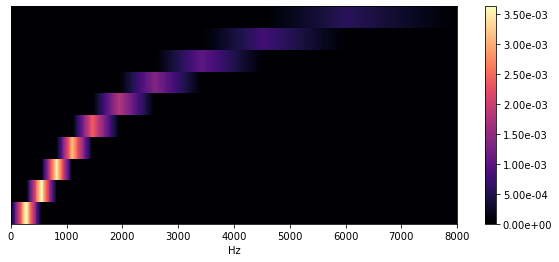

In [23]:
# Mel filter banks
n_fft = 1024
filter_banks = librosa.filters.mel(n_fft=n_fft, sr=fs, n_mels=10)
print(filter_banks.shape)

plt.figure(figsize=(10,4))
librosa.display.specshow(filter_banks, sr=fs, x_axis='linear')
plt.colorbar(format="%.2e")
plt.show()

In [28]:
help(librosa.filters.mel)

Help on function mel in module librosa.filters:

mel(sr, n_fft, n_mels=128, fmin=0.0, fmax=None, htk=False, norm='slaney', dtype=<class 'numpy.float32'>)
    Create a Mel filter-bank.
    
    This produces a linear transformation matrix to project
    FFT bins onto Mel-frequency bins.
    
    Parameters
    ----------
    sr        : number > 0 [scalar]
        sampling rate of the incoming signal
    
    n_fft     : int > 0 [scalar]
        number of FFT components
    
    n_mels    : int > 0 [scalar]
        number of Mel bands to generate
    
    fmin      : float >= 0 [scalar]
        lowest frequency (in Hz)
    
    fmax      : float >= 0 [scalar]
        highest frequency (in Hz).
        If `None`, use ``fmax = sr / 2.0``
    
    htk       : bool [scalar]
        use HTK formula instead of Slaney
    
    norm : {None, 'slaney', or number} [scalar]
        If 'slaney', divide the triangular mel weights by the width of the mel band
        (area normalization).
    
      

In [8]:
help(librosa.feature.melspectrogram)

Help on function melspectrogram in module librosa.feature.spectral:

melspectrogram(y=None, sr=22050, S=None, n_fft=2048, hop_length=512, win_length=None, window='hann', center=True, pad_mode='reflect', power=2.0, **kwargs)
    Compute a mel-scaled spectrogram.
    
    If a spectrogram input ``S`` is provided, then it is mapped directly onto
    the mel basis by ``mel_f.dot(S)``.
    
    If a time-series input ``y, sr`` is provided, then its magnitude spectrogram
    ``S`` is first computed, and then mapped onto the mel scale by
    ``mel_f.dot(S**power)``.
    
    By default, ``power=2`` operates on a power spectrum.
    
    Parameters
    ----------
    y : np.ndarray [shape=(n,)] or None
        audio time-series
    
    sr : number > 0 [scalar]
        sampling rate of ``y``
    
    S : np.ndarray [shape=(d, t)]
        spectrogram
    
    n_fft : int > 0 [scalar]
        length of the FFT window
    
    hop_length : int > 0 [scalar]
        number of samples between succes

2.220446049250313e-16

In [29]:
help(librosa.power_to_db)

Help on function power_to_db in module librosa.core.spectrum:

power_to_db(S, ref=1.0, amin=1e-10, top_db=80.0)
    Convert a power spectrogram (amplitude squared) to decibel (dB) units
    
    This computes the scaling ``10 * log10(S / ref)`` in a numerically
    stable way.
    
    Parameters
    ----------
    S : np.ndarray
        input power
    
    ref : scalar or callable
        If scalar, the amplitude ``abs(S)`` is scaled relative to ``ref``::
    
            10 * log10(S / ref)
    
        Zeros in the output correspond to positions where ``S == ref``.
    
        If callable, the reference value is computed as ``ref(S)``.
    
    amin : float > 0 [scalar]
        minimum threshold for ``abs(S)`` and ``ref``
    
    top_db : float >= 0 [scalar]
        threshold the output at ``top_db`` below the peak:
        ``max(10 * log10(S)) - top_db``
    
    Returns
    -------
    S_db : np.ndarray
        ``S_db ~= 10 * log10(S) - 10 * log10(ref)``
    
    See Also
    -

inf

{'window': 0.064, 'window_length': 1024, 'overlap': 0.5, 'overlap_length': 512, 'hop_length': 512, 'n_fft': 1024}
Size of mel_spect: (64, 313), total number of points: 20032


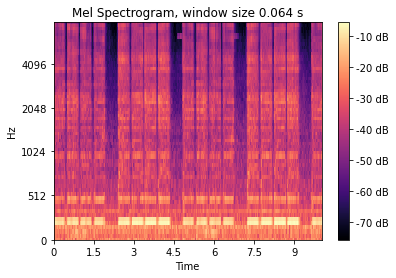

In [55]:
def get_melspectogram(file_path, window, overlap=None, n_fft=None, n_mels=32):
    # Load the signal
    signal, fs = librosa.load(file_path, sr=None)
    
    # Window length in samples
    window_length = int(window*fs)
    
    # Default overlap is 50% of the window size
    if overlap==None:
        overlap = 0.5
    
    # Overlap in samples
    overlap_length = int(window_length*overlap)
    
    # Hop length in samples
    hop_length = window_length-overlap_length
    
    # Default n_fft is the smallest power of 2 larger than win_length
    if n_fft==None:
        n_fft = int(2**np.ceil(np.log2(window_length)))
   
    # Compute mel spectogram
    mel_spect = librosa.feature.melspectrogram(y=signal, sr=fs, 
                                               win_length=window_length, 
                                               hop_length=hop_length,
                                               n_fft=n_fft,
                                               n_mels=n_mels)
    # Mel spectogram in decibels
    mel_spect_db = librosa.power_to_db(mel_spect, ref=1.0, amin=sys.float_info.epsilon, top_db=np.inf)

    params = {}
    params['window'] = window
    params['window_length'] = window_length
    params['overlap'] = overlap
    params['overlap_length'] = overlap_length
    params['hop_length'] = hop_length
    params['n_fft'] = n_fft
    
    return mel_spect, mel_spect_db, params

# Compute and plot mel spectogram
window = 1024/fs # 2
n_mels = 64
mel_spect, mel_spect_db, params = get_melspectogram(file_path, window=window, overlap=0.5, n_mels=n_mels) 

print(params)

print(f"Size of mel_spect: {mel_spect.shape}, total number of points: {mel_spect.size}")
librosa.display.specshow(mel_spect_db, sr=fs, hop_length=params['overlap_length'], x_axis='time', y_axis='mel');
# times = librosa.times_like(mel_spect, sr=fs, hop_length=params['overlap_length'])
# librosa.display.specshow(mel_spect_db, sr=fs, hop_length=params['overlap_length'], x_coords = times, y_axis='mel');

plt.title(f"Mel Spectrogram, window size {params['window']} s");
plt.colorbar(format='%+2.0f dB');

In [67]:
n_frames = 5
dims = n_mels * n_frames
vectorarray_size = len(mel_spect_db[0, :]) - n_frames + 1

vectorarray = np.zeros((vectorarray_size, dims), float)
for t in range(n_frames):
    vectorarray[:, n_mels * t: n_mels * (t + 1)] = mel_spect_db[:, t: t + vectorarray_size].T


vectorarray.shape


(309, 320)

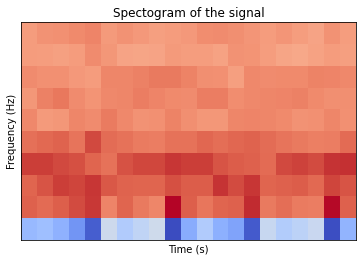

In [11]:
win_length = int(1*fs)
n_fft = win_length
hop_length = win_length//2
mfcc = librosa.feature.mfcc(signal, n_fft=n_fft, win_length=win_length, hop_length=hop_length, n_mfcc=10)

librosa.display.specshow(mfcc, sr=fs, hop_length=hop_length)
plt.title("Spectogram of the signal")
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.show()

In [12]:
mfcc.shape

(10, 21)